In [1]:
from standardInclude import *

Welcome to JupyROOT 6.20/04
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


# Nearline Upgrade: Run 4

### This notebook is designed to go through each of the analyzers present in the Run 3 files (processed on the nearline) and the Run 4 files (processed on the local SLF7 container). These files were processed with the same fcl file, and so should be exactly the same if the background code is the same. 

We expect there to be small differences, due to upgrades in the reconstruction (and parameters not explicitely set in the fcl file) between v9_30 (which the nearline ran on for run3) and v9_44 (current test release). If there are any differences, we can explore them here as well

---

### Lets first write some simple helper functions

In [2]:
def compareHists(h1i, h2i, doLog = False, drawOpt="hist"):
    
    h1 = h1i.Clone("h1")
    h2 = h2i.Clone("h1")
    
    h3 = h1.Clone()
    h3.Add(h2, -1)
    
    c = r.TCanvas("c_"+str(np.random.randint(1,10000000)),"c_"+str(np.random.randint(1,10000000)),1600,600)
    c.Divide(3)
    c.cd(1)
    h1.DrawCopy(drawOpt)
    
    c.cd(2)
    h3.SetTitle("Difference (Left - Right)")
    h3.DrawCopy(drawOpt)
    h3_inv = h3.Clone("h3_inv")
    func = r.TF1("func","pol0",-100000000,1000000000)
    func.SetParameter(0,-1)
    h3_inv.Multiply(func)
    h3_inv.SetLineColor(2)
    h3_inv.DrawCopy(drawOpt+" same")
    
    c.cd(3)
    h2.DrawCopy(drawOpt)
    
    
    if(doLog):
        for i in range(3):
            c.cd(i+1)
            r.gPad.SetLogy()
    
    c.Draw()
    return c

---

### And now we can open the files and start looping through them

In [3]:
#first lets get the files we want to loop over

files = {
    "Run 3":r.TFile("./data/gm2offline_full_34921_00100_nearline_slf6.root"),
    "Run 4":r.TFile("./data/gm2offline_full_slf7.root")
}
print(files)

{'Run 3': <ROOT.TFile object ("./data/gm2offline_full_34921_00100_nearline_slf6.root") at 0x55eb58bbca40>, 'Run 4': <ROOT.TFile object ("./data/gm2offline_full_slf7.root") at 0x55eb58b0b590>}


Warning in <TClass::Init>: no dictionary for class gm2aux::IBMSRawArtRecord is available
Warning in <TClass::Init>: no dictionary for class gm2aux::IBMSBeamProfileArtRecord is available


In [4]:
#compare to make sure all analyzers are there
for name in files:
    f = files[name]
    f.ls()

TFile**		./data/gm2offline_full_34921_00100_nearline_slf6.root	
 TFile*		./data/gm2offline_full_34921_00100_nearline_slf6.root	
  KEY: TDirectoryFile	nearlineHistTree;1	nearlineHistTree (CaloNearlineHistograms) folder
  KEY: TDirectoryFile	clusterTree;1	clusterTree (ClusterTree) folder
  KEY: TDirectoryFile	t0Analyzer;1	t0Analyzer (T0PulseProcessorAnalyzer) folder
  KEY: TDirectoryFile	ibmsAnalyzer;1	ibmsAnalyzer (IBMSAnalyzer) folder
  KEY: TDirectoryFile	CoincidenceFinderLM;1	CoincidenceFinderLM (CoincidenceFinderLM) folder
  KEY: TDirectoryFile	CTvsTT;1	CTvsTT (CTvsTTComparison) folder
  KEY: TDirectoryFile	FastRotation;1	FastRotation
TFile**		./data/gm2offline_full_slf7.root	
 TFile*		./data/gm2offline_full_slf7.root	
  KEY: TDirectoryFile	nearlineHistTree;1	nearlineHistTree (CaloNearlineHistograms) folder
  KEY: TDirectoryFile	clusterTree;1	clusterTree (ClusterTree) folder
  KEY: TDirectoryFile	t0Analyzer;1	t0Analyzer (T0PulseProcessorAnalyzer) folder
  KEY: TDirectoryFile	ibmsAna

---

# nearlineHistTree

### First lets check out the main nearline analyzer

---

In [5]:
folder = "nearlineHistTree"
f.cd("nearlineHistTree/calo1")
#f.ls()

True

[<ROOT.TH1D object ("allCaloEnergiesRun 3") at 0x55eb5951fb90>, <ROOT.TH1D object ("allCaloEnergiesRun 4") at 0x55eb59dcfd80>]
[<ROOT.TH1D object ("allCaloWiggleRun 3") at 0x55eb59725670>, <ROOT.TH1D object ("allCaloWiggleRun 4") at 0x55eb59d006d0>]
[<ROOT.TH1D object ("allCaloTimesRun 3") at 0x55eb59d006d0>, <ROOT.TH1D object ("allCaloTimesRun 4") at 0x55eb590eaea0>]
[<ROOT.TH1D object ("calo3/xtal12EnergyRun 3") at 0x55eb590eaea0>, <ROOT.TH1D object ("calo3/xtal12EnergyRun 4") at 0x55eb5927eae0>]
[<ROOT.TCanvas object ("c_2226269") at 0x55eb59025900>, <ROOT.TCanvas object ("c_3922742") at 0x55eb589c8fb0>, <ROOT.TCanvas object ("c_7173618") at 0x55eb5900c2c0>, <ROOT.TCanvas object ("c_7089034") at 0x55eb589f8860>]


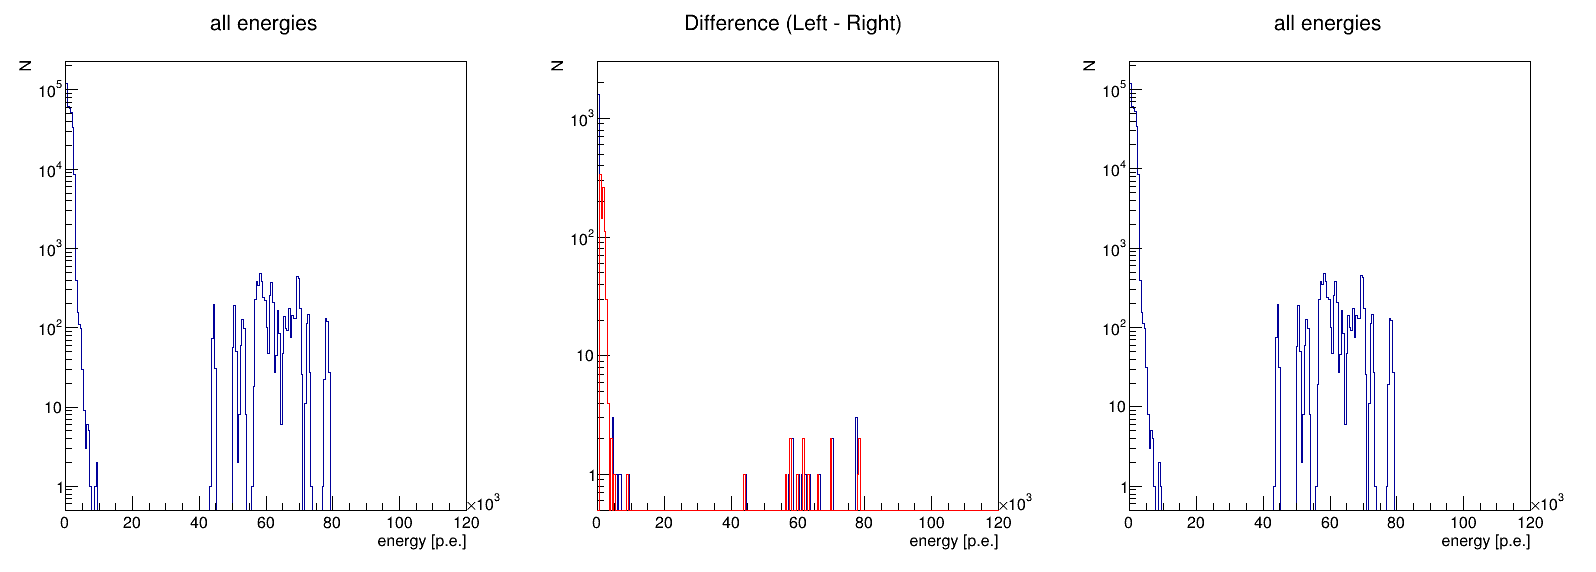

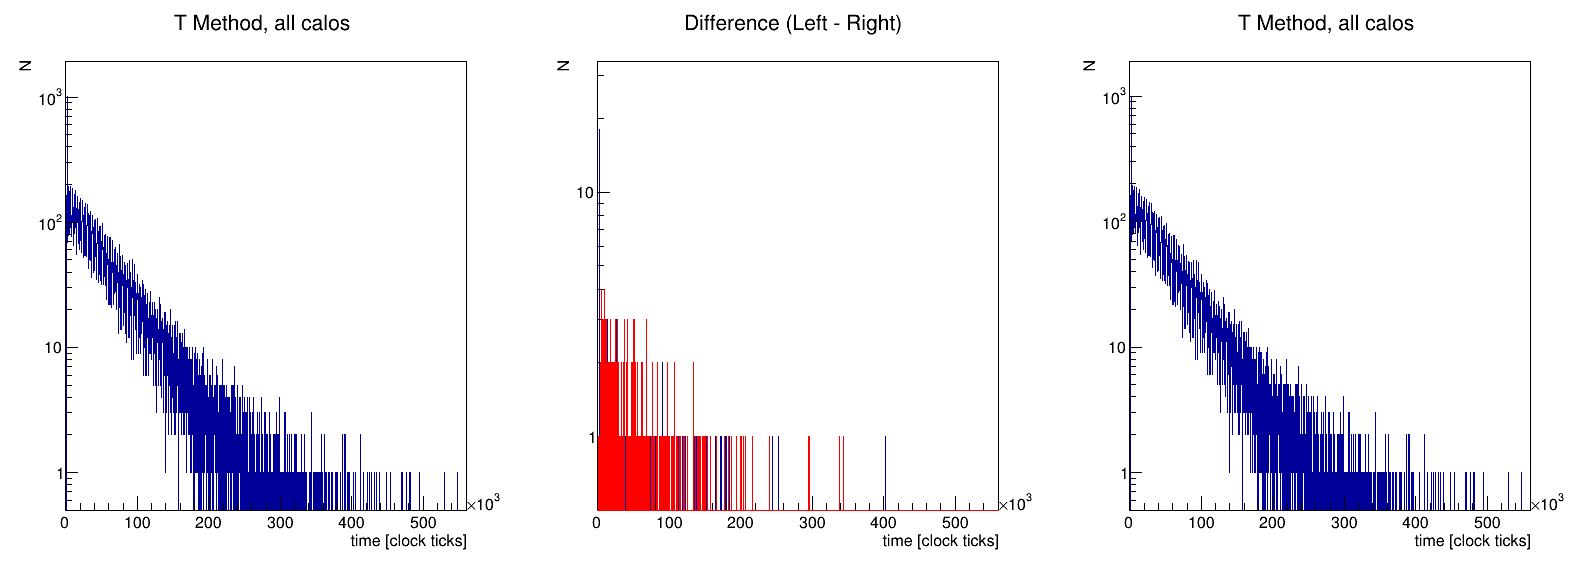

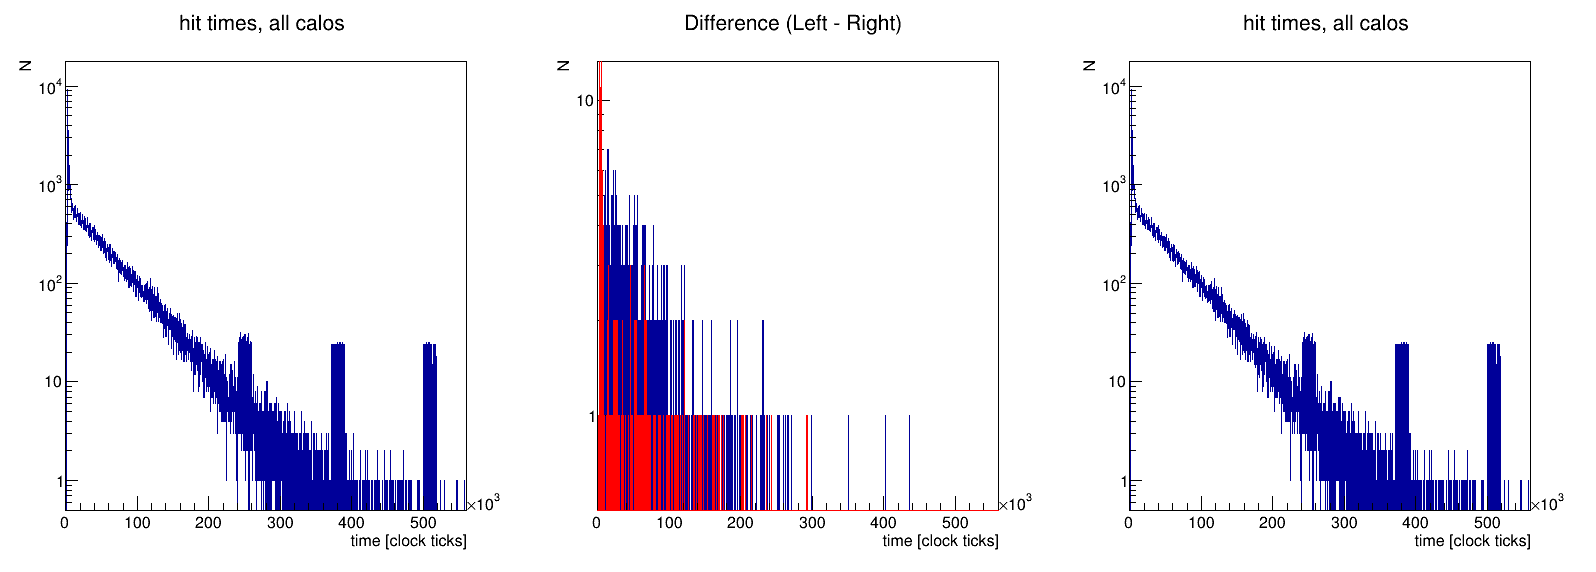

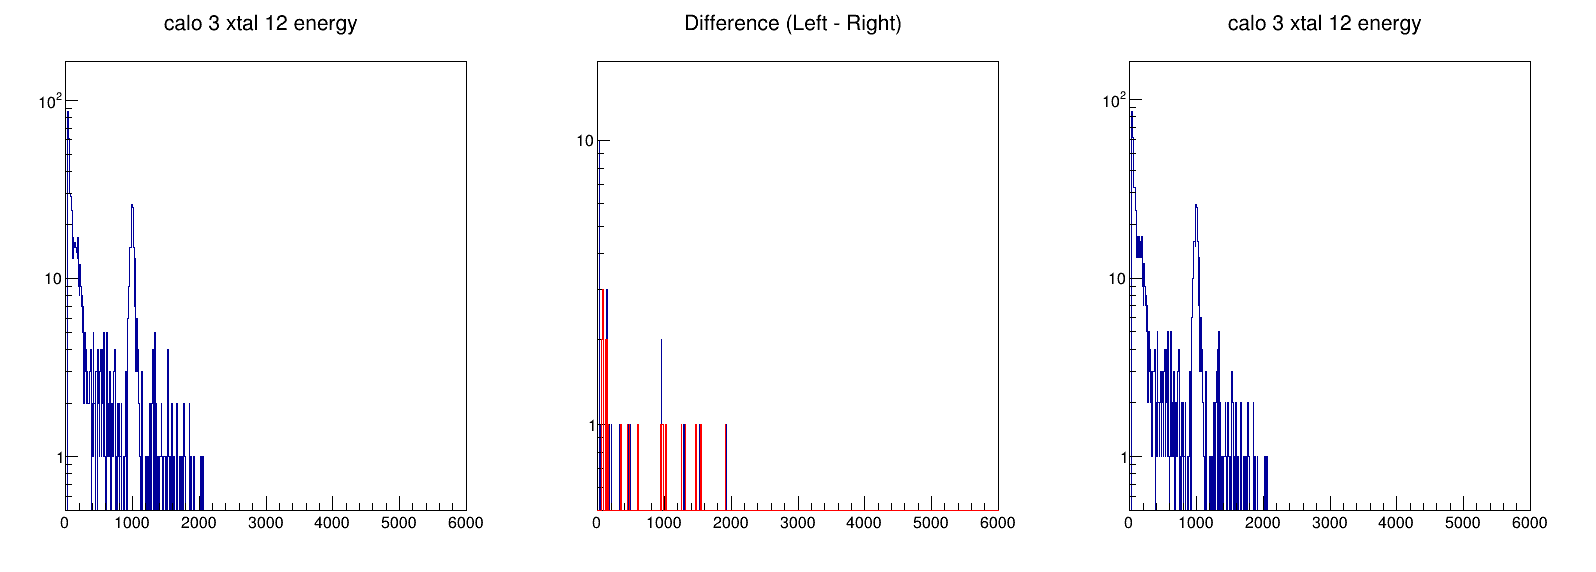

In [27]:
hists = ['allCaloEnergies', 'allCaloWiggle', 'allCaloTimes', "calo3/xtal12Energy"]
canvases = []
for hname in hists:
    histsi = []
    for name in files:
        histsi.append( files[name].Get(folder+"/"+hname).Clone(hname+name) )
    print(histsi)
    c = compareHists(histsi[0], histsi[1],True)
    canvases.append(c)
print(canvases)

{'Run 3': <ROOT.TTree object ("eventTree") at 0x55eb5973b680>}
{'Run 3': <ROOT.TTree object ("eventTree") at 0x55eb5973b680>, 'Run 4': <ROOT.TTree object ("eventTree") at 0x55eb599df7e0>}


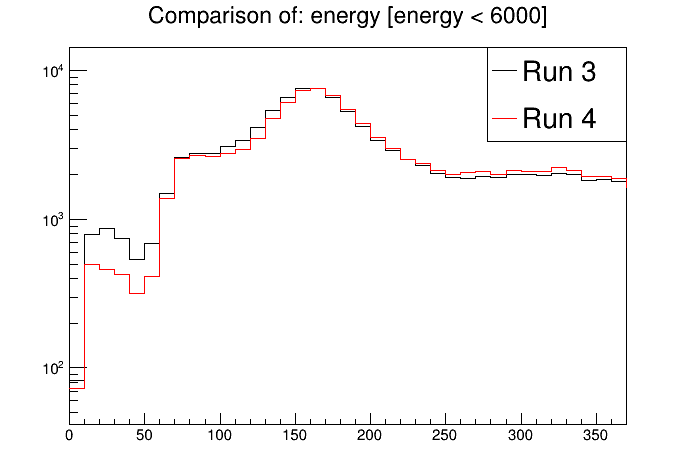

In [28]:
#1D hist comparison

treename = "eventTree"

drawname = "energy"
cutname = "energy < 6000"
fmtname = "hist"

trees = {}
hists = {}
for name in files:
    hists[name] = r.TH1D(name,"Comparison of: "+drawname+" ["+cutname+"]",
                         600,0,6000)

c = r.TCanvas()
leg = r.TLegend(0.7,0.7,0.9,0.9)
for i,name in enumerate(files):
    trees[name] = files[name].Get(folder+"/"+treename)
    print(trees)
    #trees[name].Print()
    trees[name].SetLineColor(i+1)
    hists[name].SetLineColor(i+1)
    if(i == 0):
        trees[name].Draw(drawname+" >> "+name, cutname, fmtname)
    else:
        trees[name].Draw(drawname+" >> "+name, cutname, fmtname+" SAME")
    leg.AddEntry(trees[name],name,"l")
leg.Draw()
c.SetLogy()
#hists['Run 3'].GetYaxis().SetRangeUser(1000,1000)
#hists['Run 3'].GetXaxis().SetRangeUser(1000,3200)
hists['Run 3'].GetXaxis().SetRangeUser(0,370)
c.Draw()

### Now we can also loop over the trees together and compare these islands 1:1